In [116]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv("C:/Users/ADMIN/Desktop/neuronai/EDA/data/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [118]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [119]:
df.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [120]:
df.loc[0:122,'Region']='Bejaia'
df.loc[124:,'Region']='Sidi-bel'

In [121]:
df.drop(labels=122,axis=0,inplace=True)

In [122]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN


In [123]:
df.drop(labels=123,axis=0,inplace=True)

In [124]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [125]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [126]:
df[df['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-bel


In [127]:
df.drop(labels=167,axis=0,inplace=True)

In [128]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 30.4+ KB


In [130]:
df['year'].astype('int')

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
241    2012
242    2012
243    2012
244    2012
245    2012
Name: year, Length: 243, dtype: int32

In [131]:
for i in range(3):
    col=df.columns[i]
    df[col]=df[col].astype('int')

In [132]:
for i in range(3,13):
    col=df.columns[i]
    df[col]=df[col].astype('float')

In [167]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'region1',
       'label_region'],
      dtype='object')

In [166]:
df.drop(labels=1,axis=1,inplace=True)

In [143]:
from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()
df['label_region']=label_enc.fit_transform(df['Region'])

In [151]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc=OneHotEncoder(handle_unknown='ignore',sparse=False)

enc=pd.DataFrame(onehot_enc.fit_transform(df[['label_region']]))


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
238,0.0,1.0
239,0.0,1.0
240,0.0,1.0
241,0.0,1.0


In [179]:
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,...,BUI,FWI,Classes,Region,region1,label_region,0,1,0,1
0,0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,...,3.4,0.5,not fire,Bejaia,1.0,0.0,1.0,0.0,1.0,0.0
1,1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,...,3.9,0.4,not fire,Bejaia,1.0,0.0,1.0,0.0,1.0,0.0
2,2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,...,2.7,0.1,not fire,Bejaia,1.0,0.0,1.0,0.0,1.0,0.0
3,3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,...,1.7,0.0,not fire,Bejaia,1.0,0.0,1.0,0.0,1.0,0.0
4,4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,...,3.9,0.5,not fire,Bejaia,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,...,16.9,6.5,fire,Sidi-bel,1.0,1.0,0.0,1.0,0.0,1.0
242,242,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,...,6.2,0.0,not fire,Sidi-bel,1.0,1.0,0.0,1.0,0.0,1.0
243,243,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,...,3.4,0.2,not fire,Sidi-bel,1.0,1.0,NaN,NaN,NaN,NaN
244,244,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,...,5.1,0.7,not fire,Sidi-bel,1.0,1.0,NaN,NaN,NaN,NaN


In [181]:
df.drop(labels=[243,244,245],inplace=True,axis=0)
df.drop(labels=[0,1],axis=1,inplace=True)


In [183]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,region1,label_region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1.0,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,1.0,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,1.0,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,1.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,23.0,9.0,2012.0,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,fire,Sidi-bel,1.0,1.0
239,24.0,9.0,2012.0,26.0,49.0,6.0,2.0,61.3,11.9,28.1,0.6,11.9,0.4,not fire,Sidi-bel,1.0,1.0
240,25.0,9.0,2012.0,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,not fire,Sidi-bel,1.0,1.0
241,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-bel,1.0,1.0


In [184]:
#df=df.join(enc)

df=pd.concat([df,enc],axis=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,region1,label_region,0,1
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1.0,0.0,1.0,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,1.0,0.0,1.0,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,1.0,0.0,1.0,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,1.0,0.0,1.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,23.0,9.0,2012.0,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,fire,Sidi-bel,1.0,1.0,0.0,1.0
239,24.0,9.0,2012.0,26.0,49.0,6.0,2.0,61.3,11.9,28.1,0.6,11.9,0.4,not fire,Sidi-bel,1.0,1.0,0.0,1.0
240,25.0,9.0,2012.0,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,not fire,Sidi-bel,1.0,1.0,0.0,1.0
241,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-bel,1.0,1.0,0.0,1.0


In [185]:
df.drop(labels='label_region',axis=1)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,region1,0,1
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1.0,1.0,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,1.0,1.0,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,1.0,1.0,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,1.0,1.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,23.0,9.0,2012.0,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,fire,Sidi-bel,1.0,0.0,1.0
239,24.0,9.0,2012.0,26.0,49.0,6.0,2.0,61.3,11.9,28.1,0.6,11.9,0.4,not fire,Sidi-bel,1.0,0.0,1.0
240,25.0,9.0,2012.0,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,not fire,Sidi-bel,1.0,0.0,1.0
241,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-bel,1.0,0.0,1.0


In [190]:
df.rename(columns={0:'Region_Bejaia',1:'Region_Sidi_bel'},inplace=True)

In [188]:
df.drop(labels={'Region','region1','label_region'},axis=1,inplace=True)

In [210]:
df['Classes  ']=df['Classes  '].str.strip()
df['Classes  '].value_counts()
df['Classes  ']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241        fire
242    not fire
Name: Classes  , Length: 243, dtype: object

In [230]:
df['Classes  ']=df['Classes  '].map({'not fire':0,'fire':1})

In [140]:
df['region1']=enc.fit_transform([df['Region']])[0]
print(len(df['region1']))

243


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            240 non-null    int64  
 1   day              240 non-null    float64
 2   month            240 non-null    float64
 3   year             240 non-null    float64
 4   Temperature      240 non-null    float64
 5    RH              240 non-null    float64
 6    Ws              240 non-null    float64
 7   Rain             240 non-null    float64
 8   FFMC             240 non-null    float64
 9   DMC              240 non-null    float64
 10  DC               240 non-null    float64
 11  ISI              240 non-null    float64
 12  BUI              240 non-null    float64
 13  FWI              240 non-null    float64
 14  Classes          240 non-null    object 
 15  Region_Bejaia    240 non-null    float64
 16  Region_Sidi_bel  240 non-null    float64
dtypes: float64(15), 

<Figure size 720x720 with 0 Axes>

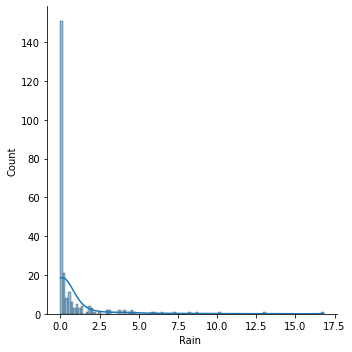

In [90]:
plt.figure(figsize=(10,10))
sns.displot(data=df,x='Rain ',kde=True)

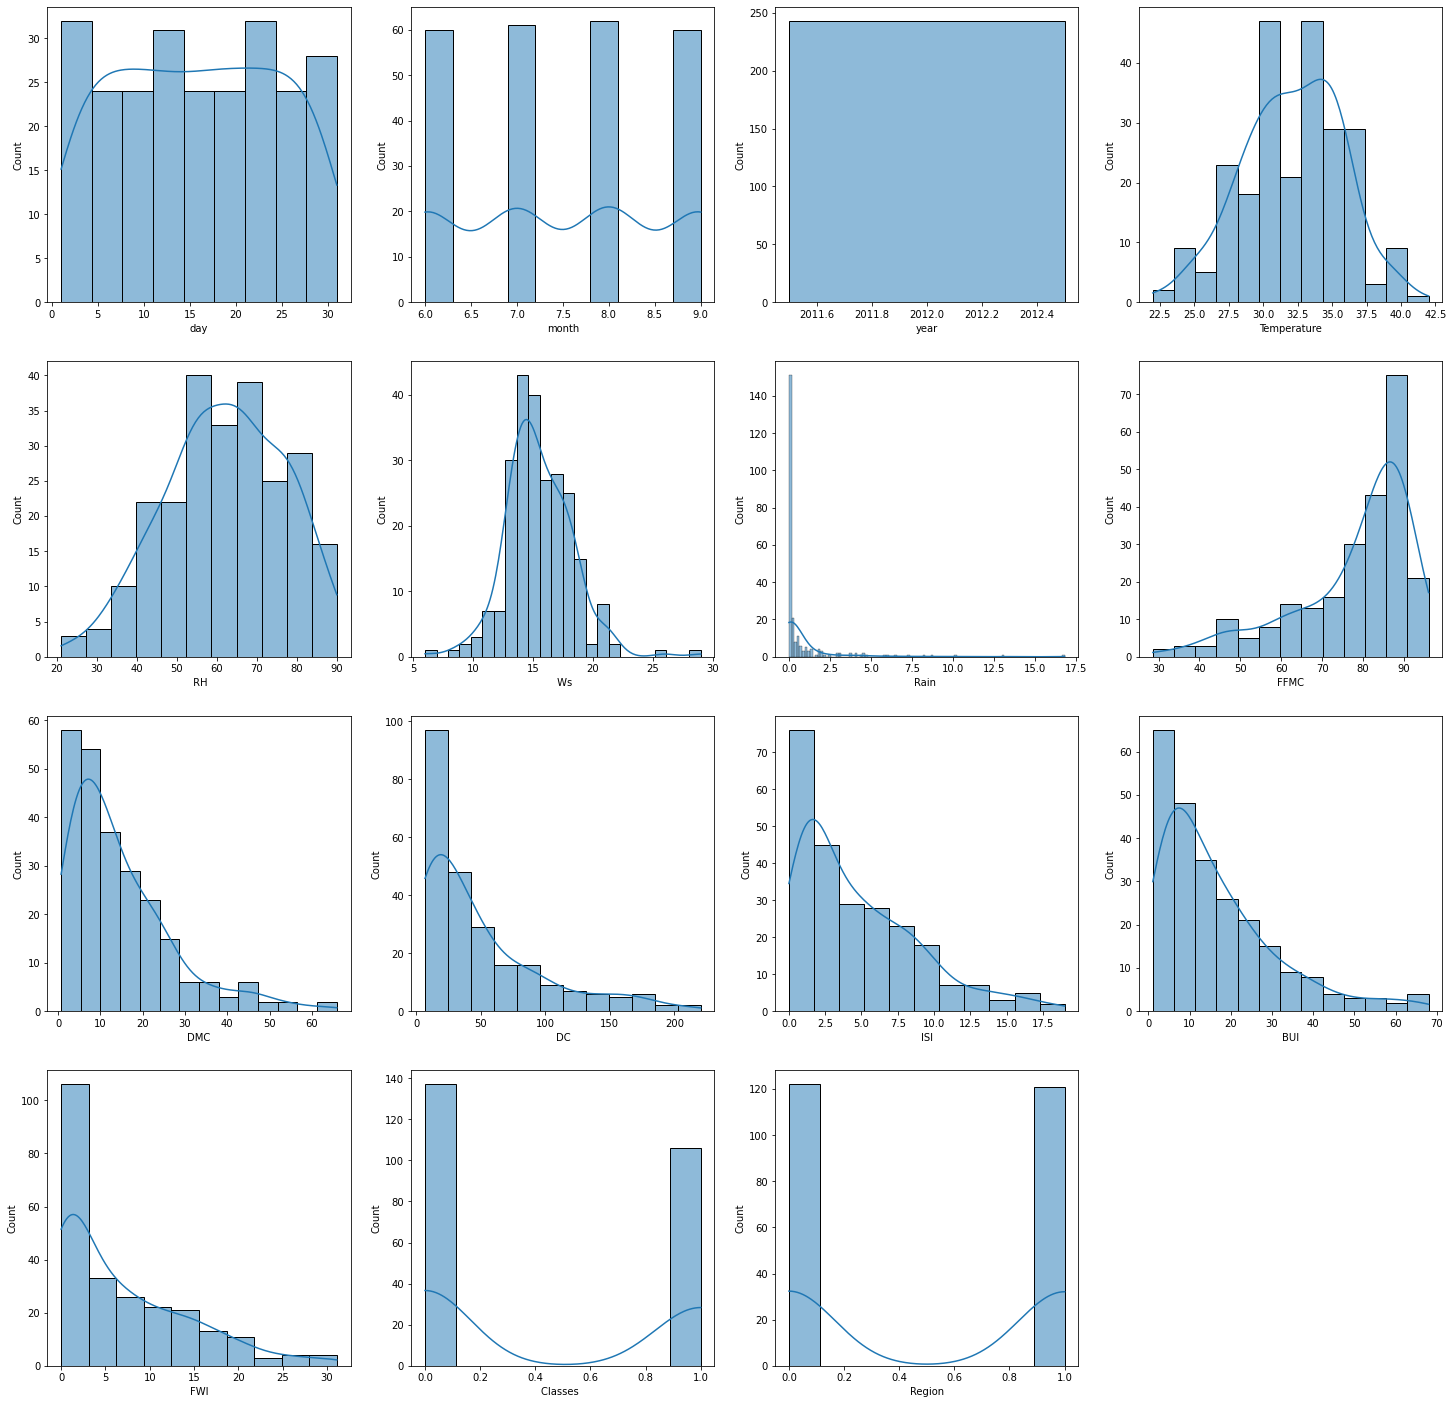

In [101]:
# univariate annalysis 
plt.figure(figsize=(25,25),facecolor='white')
pltnum=1
for i in df.columns:
    
    ax=plt.subplot(4,4,pltnum)
    sns.histplot(data=df,x=i,kde=True)
    plt.xlabel(i)
    pltnum+=1
plt.show()
    
    
    

# Observations
 the features Ws, Rain,DMC,DC,ISI,BUI ,FWI are skewed to the right
 
 RH and FFMC are skewed to the left


<AxesSubplot:>

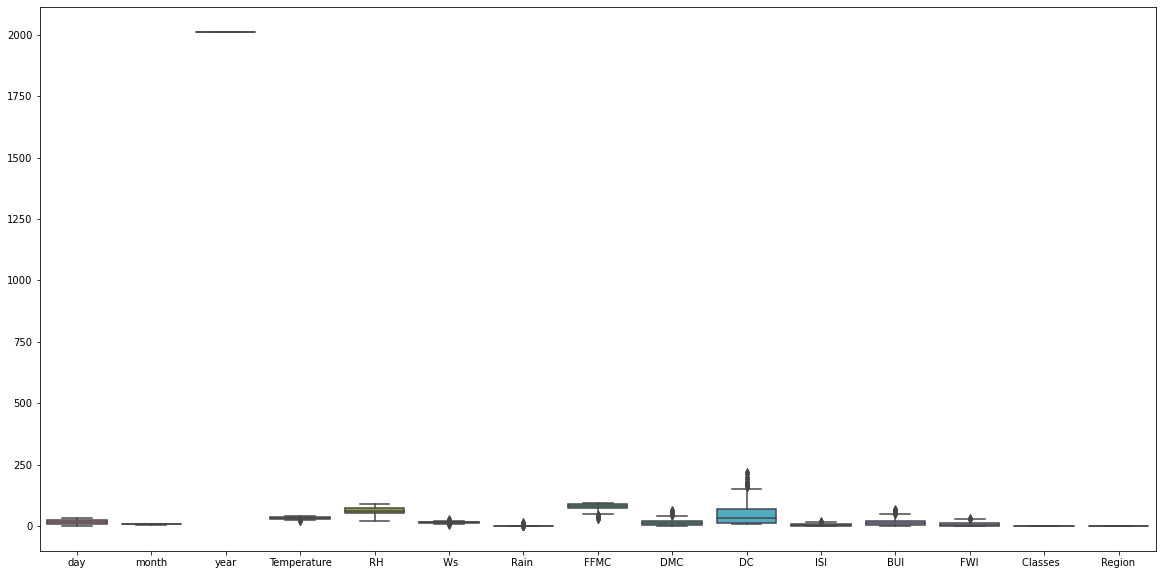

In [111]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df,ax=ax,orient='v')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train

In [237]:
# Even if there are outliers as not refining those as there is very less data
# one hot encoding of dependent variable 

from sklearn.model_selection import train_test_split

X=df.drop(labels=['Classes  '],axis=1)
Y=df['Classes  ']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [236]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


In [238]:
Xtrain_scale=scaler.fit_transform(X_train)

In [239]:
Xtest_scale=scaler.transform(X_test)

In [240]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

In [241]:
log_reg.fit(Xtrain_scale,Y_train)

LogisticRegression()

In [246]:
y_pred=log_reg.predict(Xtest_scale)

In [248]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(Y_test,y_pred)
accuracy_score

0.925

In [249]:
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(Y_test,y_pred)


In [250]:
confusion_mat

array([[28,  3],
       [ 3, 46]], dtype=int64)

In [251]:
precision=confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[0,1])

In [252]:
precision

0.9032258064516129

In [254]:
recall=confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[1,0])

In [255]:
recall

0.9032258064516129